# Medical Appointment No-Show Prediction & Demand Forecasting

**Project Goal:** Build ML systems to predict patient no-shows and forecast daily appointment demand

**Dataset:** 109,593 medical appointments with patient, appointment, health, and weather data

**This Notebook Covers:**
1. Dataset Overview
2. Missing Data Analysis
3. Target Variable Analysis (no_show)
4. Feature Distributions
5. Temporal Analysis (for forecasting)
6. Correlation Analysis
7. Data Quality Issues
8. Key Findings & Strategy for Preprocessing

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Missing data visualization
import missingno as msno

# Statistics
from scipy import stats
from scipy.stats import chi2_contingency

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✅ All libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.4.1


## 1. Dataset Overview & Initial Inspection

In [2]:
# Load data
df = pd.read_csv('../data/raw/Medical_appointment_data.csv')

print("="*80)
print("DATASET LOADED SUCCESSFULLY")
print("="*80)
print(f"\n📊 Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"💾 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n" + "="*80)

DATASET LOADED SUCCESSFULLY

📊 Dataset Shape: 109,593 rows × 26 columns
💾 Memory Usage: 73.56 MB



In [3]:
# Display first few rows
print("First 10 rows of the dataset:\n")
df.head(10)

First 10 rows of the dataset:



specialty  appointment_time gender no_show    disability  \
0         psychotherapy                17      F     yes  intellectual   
1                   NaN                 7      M      no  intellectual   
2        speech therapy                16      M      no  intellectual   
3        speech therapy                14      M     yes  intellectual   
4         physiotherapy                 8      M      no         motor   
5         psychotherapy                13      M      no  intellectual   
6        speech therapy                10      F     yes         motor   
7         physiotherapy                 7      M      no         motor   
8         physiotherapy                16      M     yes         motor   
9  occupational therapy                16      F      no  intellectual   

              place appointment_shift   age  under_12_years_old  \
0  Lake Marvinville         afternoon   9.0                   1   
1           ITAPEMA           morning  11.0                   1   
2            ITAJAÍ         afternoon   8.0                   1   
3         Sarahside         afternoon   9.0                   1   
4            ITAJAÍ           morning   NaN                   0   
5            ITAJAÍ         afternoon   9.0                   1   
6            ITAJAÍ           morning   NaN                   0   
7            ITAJAÍ           morning   7.0                   1   
8        Stokesfort         afternoon  18.0                   0   
9            ITAJAÍ         afternoon   NaN                   0   

   over_60_years_old  patient_needs_companion  average_temp_day  \
0                  0                        1             23.18   
1                  0                        1             14.31   
2                  0                        1             21.61   
3                  0                        1             21.39   
4                  0                        0             20.15   
5                  0                        1             18.92   
6                  0                        0             23.83   
7                  0                        1             17.54   
8                  0                        0             22.95   
9                  0                        0             16.77   

   average_rain_day  max_temp_day  max_rain_day  rainy_day_before  \
0              0.00          27.5           0.0                 1   
1              0.02          16.5           0.6                 1   
2              0.01          29.9           0.2                 1   
3              0.11          24.1           1.4                 1   
4              0.02          23.1           0.2                 1   
5              0.00          20.8           0.0                 1   
6              0.02          27.5           0.6                 1   
7              0.00          24.6           0.0                 1   
8              0.00          26.1           0.0                 1   
9              0.19          19.8           3.2                 1   

   storm_day_before rain_intensity heat_intensity appointment_date_continuous  \
0                 1        no_rain           warm                  2020-01-01   
1                 1        no_rain           cold                  2020-01-01   
2                 1        no_rain           warm                  2020-01-01   
3                 1       moderate           mild                  2020-01-01   
4                 1        no_rain           mild                  2020-01-01   
5                 1        no_rain           cold                  2020-01-01   
6                 1        no_rain           warm                  2020-01-01   
7                 1        no_rain           mild                  2020-01-01   
8                 1        no_rain           mild                  2020-01-01   
9                 1       moderate           cold                  2020-01-01   

   Hipertension  Diabetes  Alcoholism  Handcap  Scholarship  SMS_receiv

In [4]:
# Column names and data types
print("="*80)
print("COLUMN INFORMATION")
print("="*80)
print(f"\n📋 Total Columns: {len(df.columns)}\n")

# Create a DataFrame for better display
col_info = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes.values,
    'Non-Null Count': df.count().values,
    'Null Count': df.isnull().sum().values,
    'Null %': (df.isnull().sum() / len(df) * 100).round(2).values
})

print(col_info.to_string(index=False))
print("\n" + "="*80)

COLUMN INFORMATION

📋 Total Columns: 26

                     Column Data Type  Non-Null Count  Null Count  Null %
                  specialty    object           89466       20127   18.37
           appointment_time     int64          109593           0    0.00
                     gender    object          109593           0    0.00
                    no_show    object          109593           0    0.00
                 disability    object           92992       16601   15.15
                      place    object           98054       11539   10.53
          appointment_shift    object          109593           0    0.00
                        age   float64           86633       22960   20.95
         under_12_years_old     int64          109593           0    0.00
          over_60_years_old     int64          109593           0    0.00
    patient_needs_companion     int64          109593           0    0.00
           average_temp_day   float64          107382        2211    2.

In [5]:
# Statistical summary for numeric columns
print("="*80)
print("STATISTICAL SUMMARY - NUMERIC FEATURES")
print("="*80)
df.describe()

STATISTICAL SUMMARY - NUMERIC FEATURES


appointment_time           age  under_12_years_old  over_60_years_old  \
count     109593.000000  86633.000000       109593.000000      109593.000000   
mean          12.120966     18.632138            0.446424           0.071328   
std            3.281623     17.666999            0.497124           0.257372   
min            7.000000      2.000000            0.000000           0.000000   
25%            9.000000      8.000000            0.000000           0.000000   
50%           13.000000     12.000000            0.000000           0.000000   
75%           15.000000     18.000000            1.000000           0.000000   
max           18.000000    110.000000            1.000000           1.000000   

       patient_needs_companion  average_temp_day  average_rain_day  \
count            109593.000000     107382.000000     107348.000000   
mean                  0.519823         20.346642          0.183537   
std                   0.499609          3.446079          0.416267   
min                   0.000000          8.940000          0.000000   
25%                   0.000000         18.060000          0.000000   
50%                   1.000000         20.600000          0.010000   
75%                   1.000000         22.720000          0.150000   
max                   1.000000         28.010000          4.770000   

        max_temp_day   max_rain_day  rainy_day_before  storm_day_before  \
count  107366.000000  107330.000000     109593.000000     109593.000000   
mean       24.032910       2.048093          0.937396          0.937533   
std         3.959696       4.352247          0.242251          0.242004   
min        13.300000       0.000000          0.000000          0.000000   
25%        21.400000       0.000000          1.000000          1.000000   
50%        23.900000       0.200000          1.000000          1.000000   
75%        26.800000       1.900000          1.000000          1.000000   
max        35.400000      45.000000          1.000000          1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  109593.000000  109593.000000  109593.000000  109593.000000   
mean        0.058088       0.023952       0.018541       0.009116   
std         0.233910       0.152901       0.134899       0.095040   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

         Scholarship   SMS_received  
count  109593.000000  109593.000000  
mean        0.055113       0.311808  
std         0.228202       0.463234  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       1.000000  
max         1.000000       1.000000

In [6]:
# Summary for categorical columns
print("="*80)
print("CATEGORICAL FEATURES SUMMARY")
print("="*80)

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n📌 {col.upper()}:")
    print(f"   Unique values: {df[col].nunique()}")
    print(f"   Most common: {df[col].mode()[0] if len(df[col].mode()) > 0 else 'N/A'}")
    print(f"   Top 5 values:")
    print(df[col].value_counts().head())

CATEGORICAL FEATURES SUMMARY

📌 SPECIALTY:
   Unique values: 8
   Most common: psychotherapy
   Top 5 values:
specialty
psychotherapy           28645
speech therapy          22322
physiotherapy           21004
occupational therapy    11319
pedagogo                 3536
Name: count, dtype: int64

📌 GENDER:
   Unique values: 3
   Most common: M
   Top 5 values:
gender
M    82269
F    27077
I      247
Name: count, dtype: int64

📌 NO_SHOW:
   Unique values: 2
   Most common: no
   Top 5 values:
no_show
no     74761
yes    34832
Name: count, dtype: int64

📌 DISABILITY:
   Unique values: 3
   Most common: intellectual
   Top 5 values:
disability
intellectual    62852
motor           29721
                  419
Name: count, dtype: int64

📌 PLACE:
   Unique values: 26289
   Most common: ITAJAÍ
   Top 5 values:
place
ITAJAÍ         20515
B. CAMBORIU     6018
CAMBORIU        5523
NAVEGANTES      3901
ITAPEMA         2665
Name: count, dtype: int64

📌 APPOINTMENT_SHIFT:
   Unique values: 2
   Most

## 2. Missing Data Analysis

**Critical for deciding preprocessing strategy**
- Which features have missing values?
- How much is missing?
- Are missing values random or systematic?
- What's our strategy for each feature?

In [7]:
# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percent': (df.isnull().sum() / len(df) * 100).round(2).values,
    'Data_Type': df.dtypes.values
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("="*80)
print("MISSING DATA SUMMARY")
print("="*80)
print(f"\n⚠️  Features with missing values: {len(missing_data)}/{len(df.columns)}\n")
print(missing_data.to_string(index=False))
print("\n" + "="*80)

# Highlight critical missing data
print("\n🚨 CRITICAL MISSING DATA ISSUES:")
for idx, row in missing_data.iterrows():
    if row['Missing_Percent'] > 15:
        print(f"   • {row['Column']}: {row['Missing_Count']:,} ({row['Missing_Percent']}%) - SEVERE")
    elif row['Missing_Percent'] > 10:
        print(f"   • {row['Column']}: {row['Missing_Count']:,} ({row['Missing_Percent']}%) - HIGH")

MISSING DATA SUMMARY

⚠️  Features with missing values: 8/26

          Column  Missing_Count  Missing_Percent Data_Type
             age          22960            20.95   float64
       specialty          20127            18.37    object
      disability          16601            15.15    object
           place          11539            10.53    object
    max_rain_day           2263             2.06   float64
average_rain_day           2245             2.05   float64
    max_temp_day           2227             2.03   float64
average_temp_day           2211             2.02   float64


🚨 CRITICAL MISSING DATA ISSUES:
   • age: 22,960 (20.95%) - SEVERE
   • specialty: 20,127 (18.37%) - SEVERE
   • disability: 16,601 (15.15%) - SEVERE
   • place: 11,539 (10.53%) - HIGH


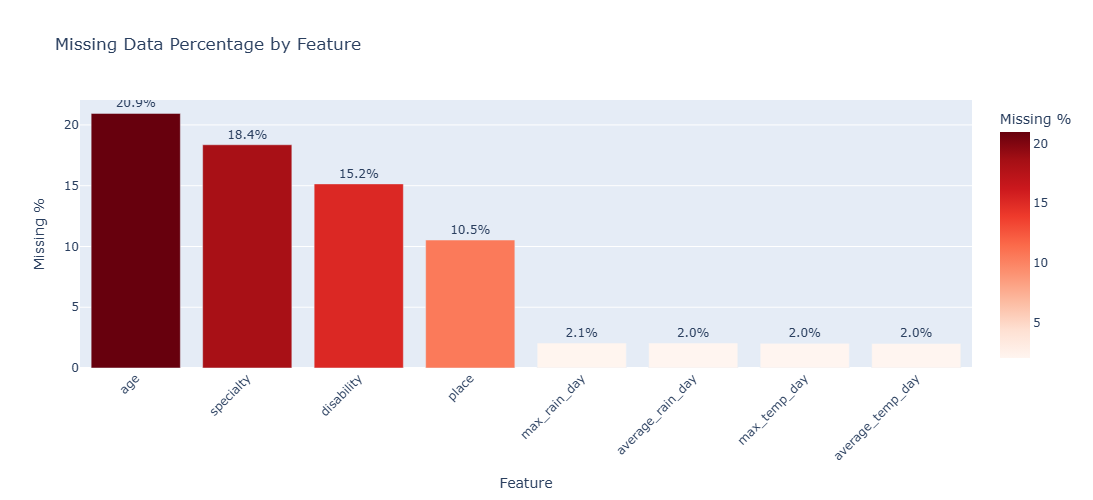

In [8]:
# Visualize missing data - Bar chart
fig = px.bar(missing_data, 
             x='Column', 
             y='Missing_Percent',
             title='Missing Data Percentage by Feature',
             labels={'Missing_Percent': 'Missing %', 'Column': 'Feature'},
             text='Missing_Percent',
             color='Missing_Percent',
             color_continuous_scale='Reds')

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(height=500, showlegend=False, xaxis_tickangle=-45)
fig.show()

Missing Data Pattern Visualization:


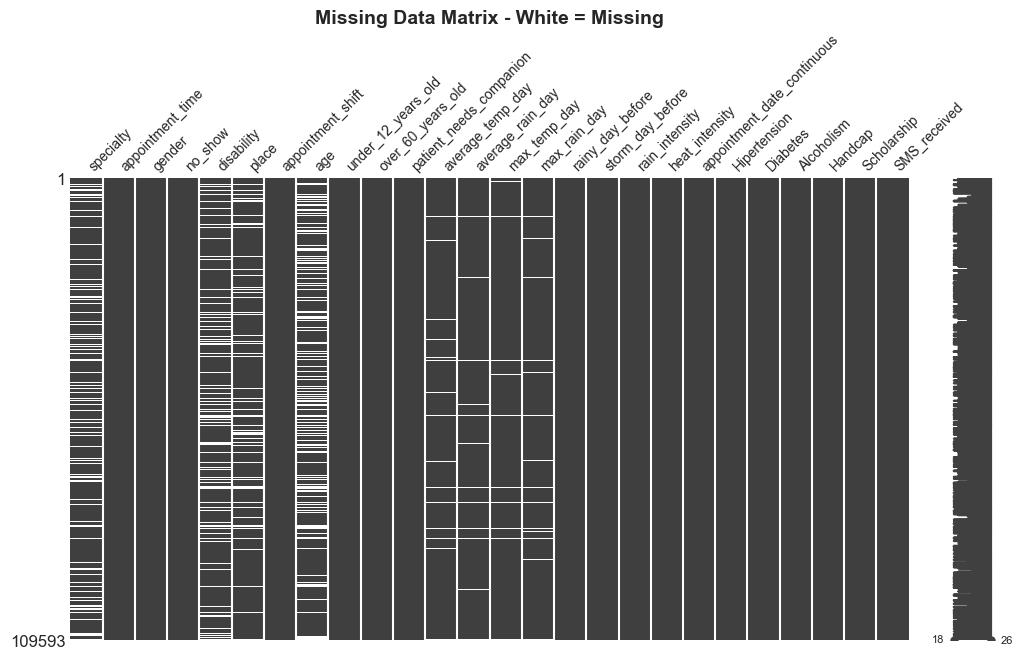

In [9]:
# Missingno matrix visualization
print("Missing Data Pattern Visualization:")
msno.matrix(df, figsize=(12, 6), fontsize=10)
plt.title('Missing Data Matrix - White = Missing', fontsize=14, fontweight='bold')
plt.show()

Missing Data Correlation Heatmap:


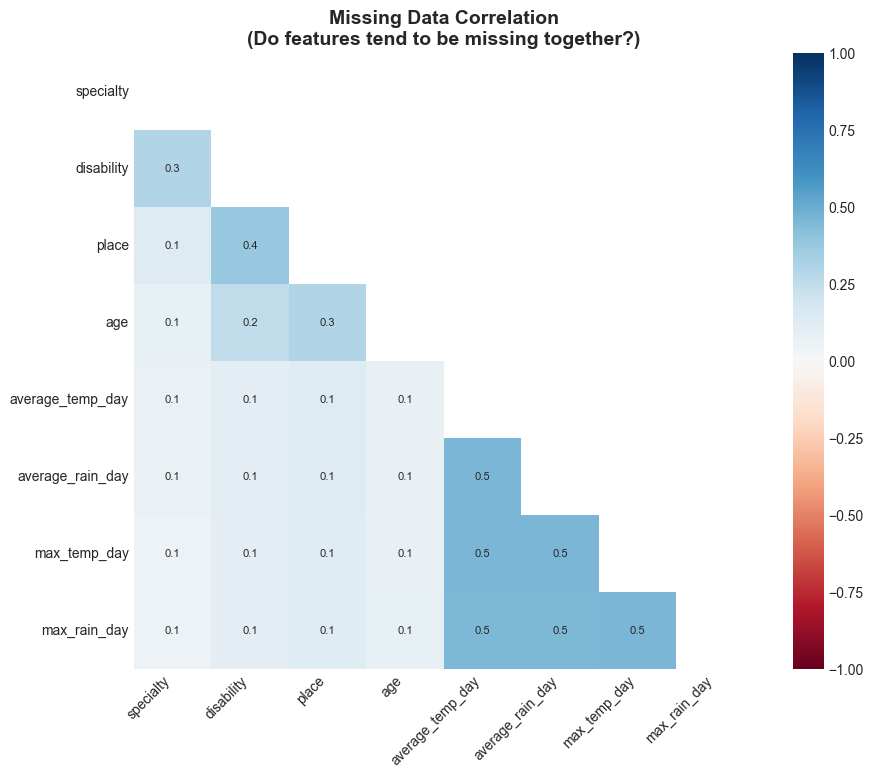

In [10]:
# Missing data heatmap - are missings correlated?
print("Missing Data Correlation Heatmap:")
msno.heatmap(df, figsize=(10, 8), fontsize=10)
plt.title('Missing Data Correlation\n(Do features tend to be missing together?)', 
          fontsize=14, fontweight='bold')
plt.show()

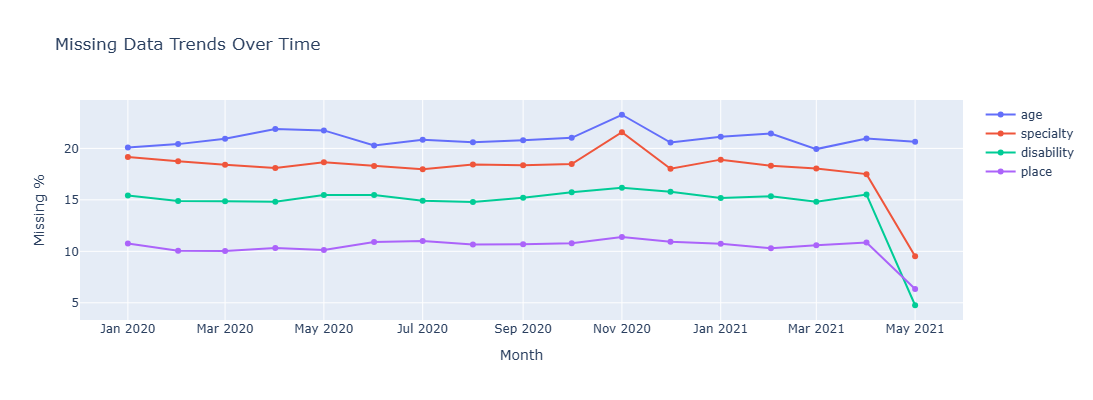


💡 INSIGHT: Check if missing data is consistent over time or varies by period


In [11]:
# Analyze missing patterns by time period
df_temp = df.copy()
df_temp['appointment_date_continuous'] = pd.to_datetime(df_temp['appointment_date_continuous'])
df_temp['year_month'] = df_temp['appointment_date_continuous'].dt.to_period('M')

missing_by_time = df_temp.groupby('year_month').agg({
    'age': lambda x: x.isnull().sum() / len(x) * 100,
    'specialty': lambda x: x.isnull().sum() / len(x) * 100,
    'disability': lambda x: x.isnull().sum() / len(x) * 100,
    'place': lambda x: x.isnull().sum() / len(x) * 100
}).reset_index()

missing_by_time['year_month'] = missing_by_time['year_month'].astype(str)

fig = go.Figure()
for col in ['age', 'specialty', 'disability', 'place']:
    fig.add_trace(go.Scatter(x=missing_by_time['year_month'], 
                             y=missing_by_time[col],
                             mode='lines+markers',
                             name=col))

fig.update_layout(title='Missing Data Trends Over Time',
                  xaxis_title='Month',
                  yaxis_title='Missing %',
                  height=400)
fig.show()

print("\n💡 INSIGHT: Check if missing data is consistent over time or varies by period")

## 3. Target Variable Analysis: no_show

**Business Problem:** 31.8% no-show rate → Revenue loss & wasted capacity

**Goal:** Understand what drives no-shows

In [12]:
# Target distribution
print("="*80)
print("TARGET VARIABLE: no_show")
print("="*80)

target_counts = df['no_show'].value_counts()
target_pct = df['no_show'].value_counts(normalize=True) * 100

print(f"\n📊 Distribution:")
print(f"   • Show (no):  {target_counts['no']:,} ({target_pct['no']:.2f}%)")
print(f"   • No-Show (yes): {target_counts['yes']:,} ({target_pct['yes']:.2f}%)")
print(f"\n⚠️  Class Imbalance Ratio: 1:{target_pct['no']/target_pct['yes']:.2f}")
print(f"   → For every 1 no-show, there are {target_pct['no']/target_pct['yes']:.1f} shows")
print("\n" + "="*80)

TARGET VARIABLE: no_show

📊 Distribution:
   • Show (no):  74,761 (68.22%)
   • No-Show (yes): 34,832 (31.78%)

⚠️  Class Imbalance Ratio: 1:2.15
   → For every 1 no-show, there are 2.1 shows



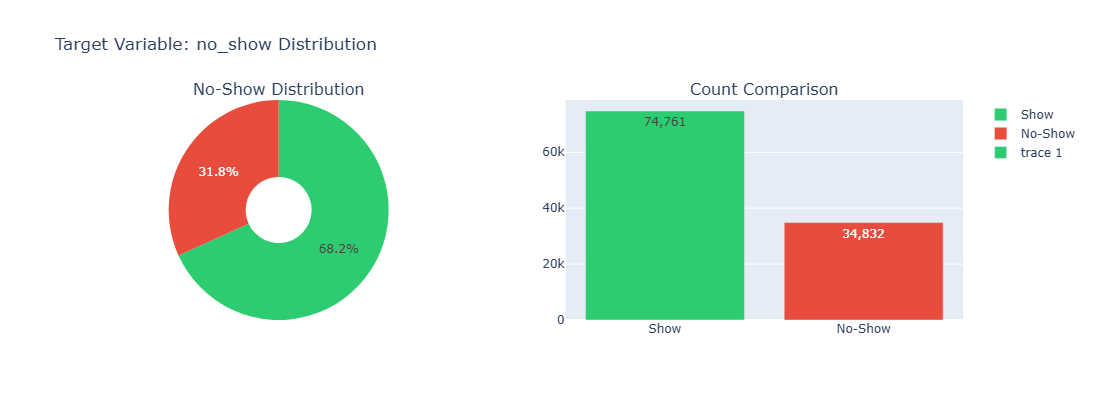

In [13]:
# Visualize target distribution
fig = make_subplots(rows=1, cols=2, 
                    specs=[[{'type':'pie'}, {'type':'bar'}]],
                    subplot_titles=('No-Show Distribution', 'Count Comparison'))

# Pie chart
fig.add_trace(go.Pie(labels=['Show', 'No-Show'], 
                     values=[target_counts['no'], target_counts['yes']],
                     marker_colors=['#2ecc71', '#e74c3c'],
                     hole=0.3), row=1, col=1)

# Bar chart
fig.add_trace(go.Bar(x=['Show', 'No-Show'], 
                     y=[target_counts['no'], target_counts['yes']],
                     marker_color=['#2ecc71', '#e74c3c'],
                     text=[f"{target_counts['no']:,}", f"{target_counts['yes']:,}"],
                     textposition='auto'), row=1, col=2)

fig.update_layout(title_text='Target Variable: no_show Distribution', height=400)
fig.show()

## 4. No-Show Rate by Key Features

**Objective:** Identify which patient/appointment characteristics correlate with no-shows

In [14]:
# No-show rate by specialty
specialty_noshow = df.groupby('specialty')['no_show'].apply(lambda x: (x == 'yes').sum() / len(x) * 100).sort_values(ascending=False)

print("="*80)
print("NO-SHOW RATE BY SPECIALTY")
print("="*80)
print(f"\n{specialty_noshow.to_string()}")
print(f"\nHighest: {specialty_noshow.idxmax()} ({specialty_noshow.max():.2f}%)")
print(f"Lowest: {specialty_noshow.idxmin()} ({specialty_noshow.min():.2f}%)")

NO-SHOW RATE BY SPECIALTY

specialty
sem especialidade       52.777778
physiotherapy           34.364883
psychotherapy           32.337232
speech therapy          27.927605
assist                  26.929134
occupational therapy    23.862532
enf                     19.750149
pedagogo                15.978507

Highest: sem especialidade (52.78%)
Lowest: pedagogo (15.98%)


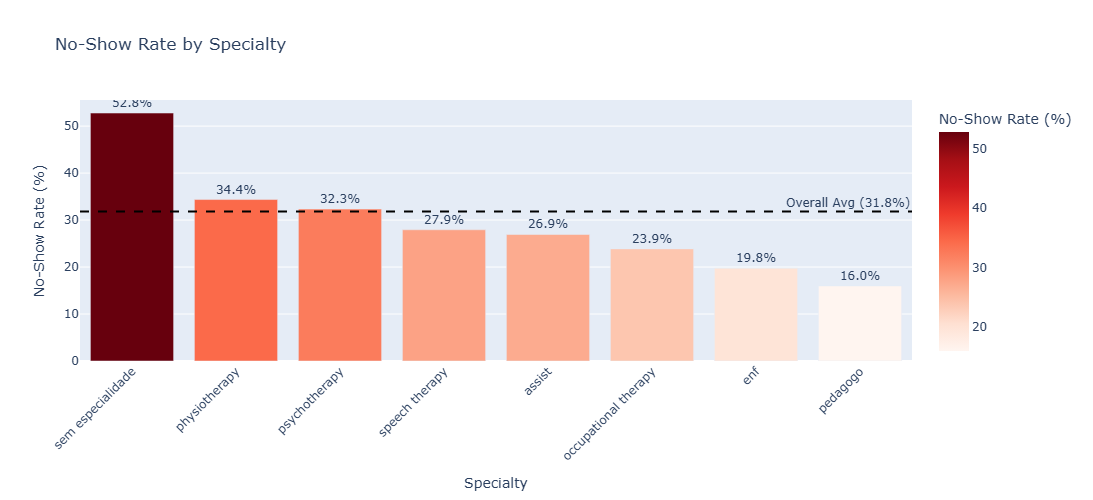

In [15]:
# Visualize no-show by specialty
fig = px.bar(specialty_noshow.reset_index(), 
             x='specialty', 
             y='no_show',
             title='No-Show Rate by Specialty',
             labels={'no_show': 'No-Show Rate (%)', 'specialty': 'Specialty'},
             text='no_show',
             color='no_show',
             color_continuous_scale='Reds')

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(height=500, xaxis_tickangle=-45)
fig.add_hline(y=31.8, line_dash="dash", line_color="black", 
              annotation_text="Overall Avg (31.8%)", annotation_position="top right")
fig.show()

In [16]:
# No-show rate by place/location
place_noshow = df.groupby('place')['no_show'].apply(lambda x: (x == 'yes').sum() / len(x) * 100).sort_values(ascending=False)

print("="*80)
print("NO-SHOW RATE BY LOCATION (Top 15)")
print("="*80)
print(f"\n{place_noshow.head(15).to_string()}")

NO-SHOW RATE BY LOCATION (Top 15)

place
Zavalachester     100.0
Zamoraview        100.0
Abigailtown       100.0
Abbotttown        100.0
Aaronview         100.0
Zacharytown       100.0
Zacharyton        100.0
Zacharyland       100.0
Zacharyhaven      100.0
Zacharychester    100.0
Zacharyberg       100.0
Yvonnetown        100.0
Yvonneport        100.0
Yvonnemouth       100.0
Yvonnefort        100.0


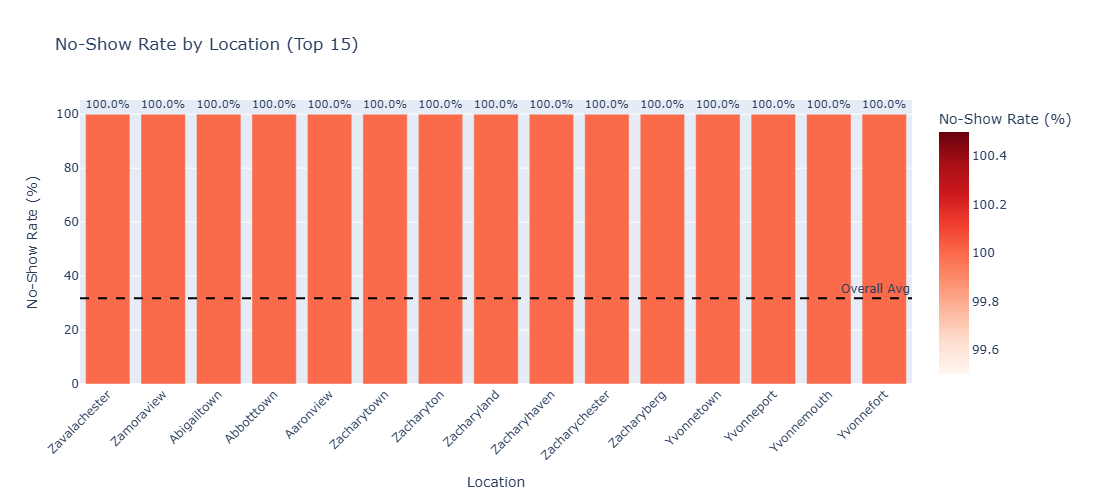

In [17]:
# Visualize top 15 locations
fig = px.bar(place_noshow.head(15).reset_index(), 
             x='place', 
             y='no_show',
             title='No-Show Rate by Location (Top 15)',
             labels={'no_show': 'No-Show Rate (%)', 'place': 'Location'},
             text='no_show',
             color='no_show',
             color_continuous_scale='Reds')

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(height=500, xaxis_tickangle=-45)
fig.add_hline(y=31.8, line_dash="dash", line_color="black", 
              annotation_text="Overall Avg", annotation_position="top right")
fig.show()

NO-SHOW RATE BY GENDER

no_show         no        yes
gender                       
F        66.310891  33.689109
I        82.591093  17.408907
M        68.801128  31.198872


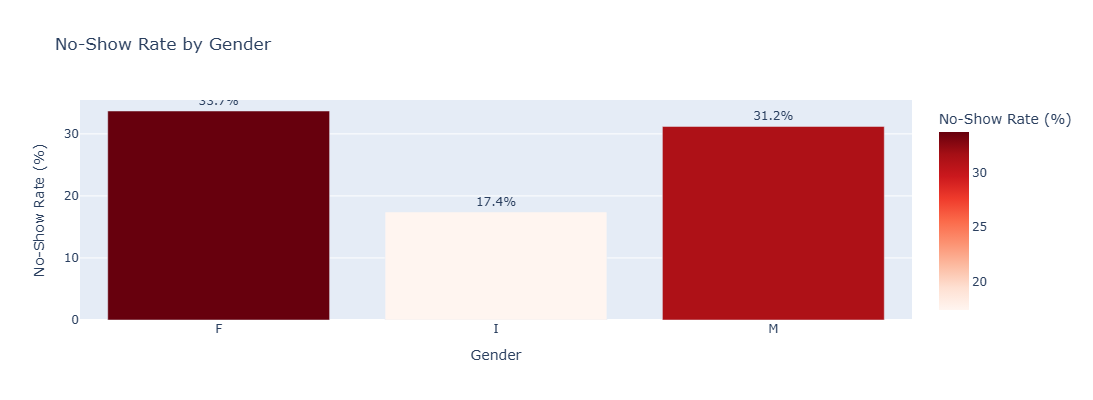

In [18]:
# No-show by gender
gender_noshow = df.groupby('gender')['no_show'].value_counts(normalize=True).unstack() * 100

print("="*80)
print("NO-SHOW RATE BY GENDER")
print("="*80)
print(f"\n{gender_noshow.to_string()}")

fig = px.bar(gender_noshow.reset_index(), 
             x='gender', 
             y='yes',
             title='No-Show Rate by Gender',
             labels={'yes': 'No-Show Rate (%)', 'gender': 'Gender'},
             text='yes',
             color='yes',
             color_continuous_scale='Reds')

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(height=400)
fig.show()

NO-SHOW RATE BY DISABILITY TYPE

disability
                67.780430
motor           29.077084
intellectual    28.987144


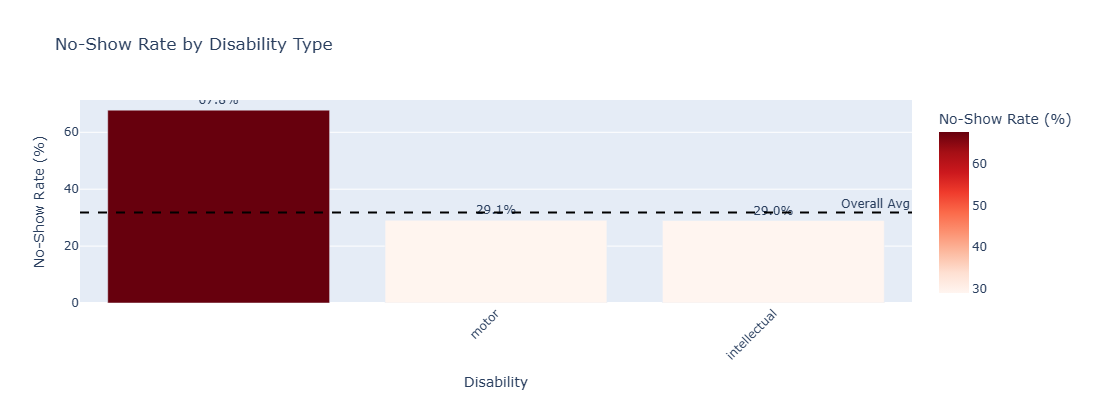

In [19]:
# No-show by disability
disability_noshow = df.groupby('disability')['no_show'].apply(lambda x: (x == 'yes').sum() / len(x) * 100).sort_values(ascending=False)

print("="*80)
print("NO-SHOW RATE BY DISABILITY TYPE")
print("="*80)
print(f"\n{disability_noshow.to_string()}")

fig = px.bar(disability_noshow.reset_index(), 
             x='disability', 
             y='no_show',
             title='No-Show Rate by Disability Type',
             labels={'no_show': 'No-Show Rate (%)', 'disability': 'Disability'},
             text='no_show',
             color='no_show',
             color_continuous_scale='Reds')

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(height=400, xaxis_tickangle=-45)
fig.add_hline(y=31.8, line_dash="dash", line_color="black", 
              annotation_text="Overall Avg", annotation_position="top right")
fig.show()

NO-SHOW RATE BY APPOINTMENT SHIFT

appointment_shift
afternoon    30.712576
morning      33.046817


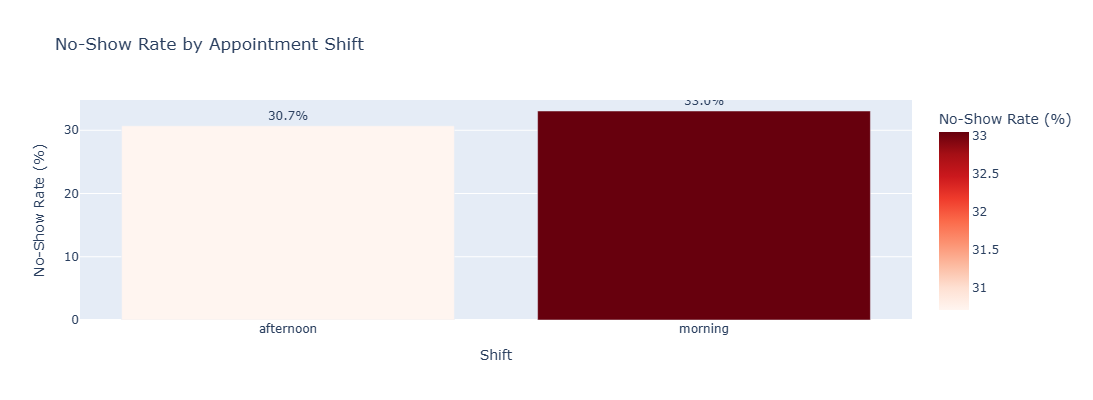

In [20]:
# No-show by appointment shift
shift_noshow = df.groupby('appointment_shift')['no_show'].apply(lambda x: (x == 'yes').sum() / len(x) * 100)

print("="*80)
print("NO-SHOW RATE BY APPOINTMENT SHIFT")
print("="*80)
print(f"\n{shift_noshow.to_string()}")

fig = px.bar(shift_noshow.reset_index(), 
             x='appointment_shift', 
             y='no_show',
             title='No-Show Rate by Appointment Shift',
             labels={'no_show': 'No-Show Rate (%)', 'appointment_shift': 'Shift'},
             text='no_show',
             color='no_show',
             color_continuous_scale='Reds')

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(height=400)
fig.show()

NO-SHOW RATE BY SMS REMINDER

No SMS (0): 31.75%
SMS Sent (1): 31.85%

💡 INSIGHT: SMS increases no-show rate by 0.10 percentage points


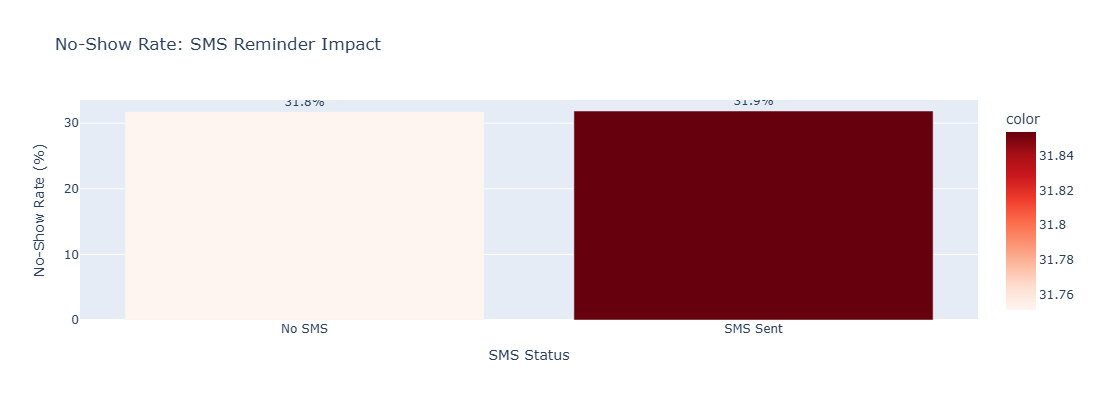

In [21]:
# No-show by SMS received
sms_noshow = df.groupby('SMS_received')['no_show'].apply(lambda x: (x == 'yes').sum() / len(x) * 100)

print("="*80)
print("NO-SHOW RATE BY SMS REMINDER")
print("="*80)
print(f"\nNo SMS (0): {sms_noshow[0]:.2f}%")
print(f"SMS Sent (1): {sms_noshow[1]:.2f}%")
print(f"\n💡 INSIGHT: SMS {'reduces' if sms_noshow[1] < sms_noshow[0] else 'increases'} no-show rate by {abs(sms_noshow[0] - sms_noshow[1]):.2f} percentage points")

fig = px.bar(x=['No SMS', 'SMS Sent'], 
             y=[sms_noshow[0], sms_noshow[1]],
             title='No-Show Rate: SMS Reminder Impact',
             labels={'x': 'SMS Status', 'y': 'No-Show Rate (%)'},
             text=[f'{sms_noshow[0]:.1f}%', f'{sms_noshow[1]:.1f}%'],
             color=[sms_noshow[0], sms_noshow[1]],
             color_continuous_scale='Reds')

fig.update_traces(textposition='outside')
fig.update_layout(height=400, showlegend=False)
fig.show()

NO-SHOW RATE BY AGE GROUP

age_group
0-12     27.656461
13-18    35.101727
19-40    45.486374
41-60    30.606518
60+      22.391898


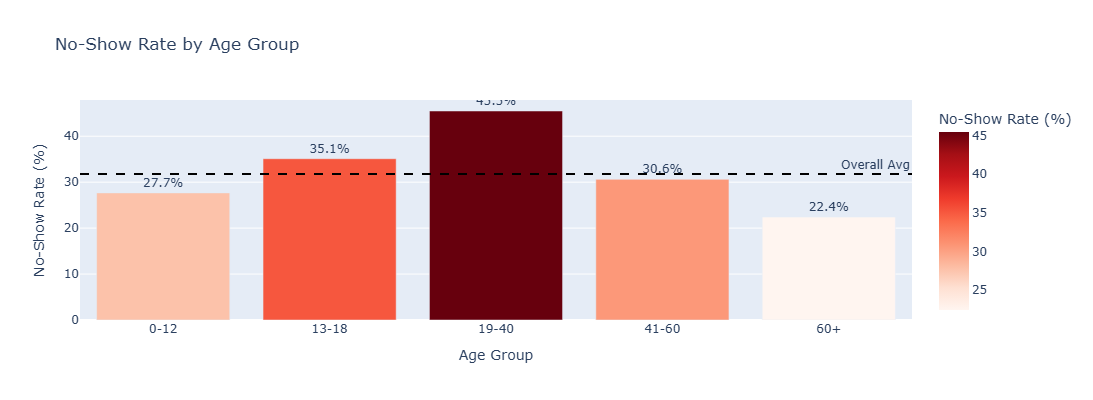

In [22]:
# No-show by age groups (handling missing values)
df_age_temp = df[df['age'].notna()].copy()
df_age_temp['age_group'] = pd.cut(df_age_temp['age'], 
                                   bins=[0, 12, 18, 40, 60, 120],
                                   labels=['0-12', '13-18', '19-40', '41-60', '60+'])

age_noshow = df_age_temp.groupby('age_group')['no_show'].apply(lambda x: (x == 'yes').sum() / len(x) * 100)

print("="*80)
print("NO-SHOW RATE BY AGE GROUP")
print("="*80)
print(f"\n{age_noshow.to_string()}")

fig = px.bar(age_noshow.reset_index(), 
             x='age_group', 
             y='no_show',
             title='No-Show Rate by Age Group',
             labels={'no_show': 'No-Show Rate (%)', 'age_group': 'Age Group'},
             text='no_show',
             color='no_show',
             color_continuous_scale='Reds')

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(height=400)
fig.add_hline(y=31.8, line_dash="dash", line_color="black", 
              annotation_text="Overall Avg", annotation_position="top right")
fig.show()

NO-SHOW RATE FOR PATIENTS WITH HEALTH CONDITIONS

   Condition  No-Show Rate
 Scholarship     31.754967
     Handcap     30.730731
  Alcoholism     28.248031
    Diabetes     27.580952
Hipertension     26.421615


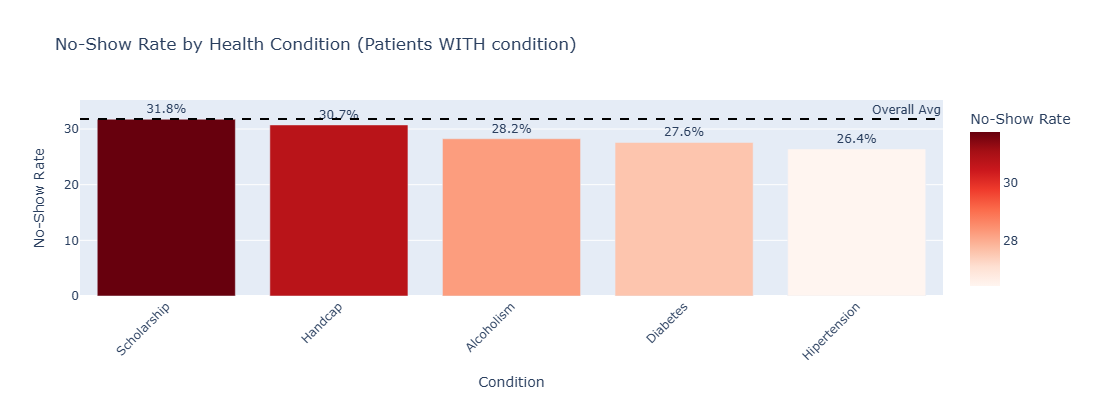

In [23]:
# No-show by health conditions
health_features = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'Scholarship']
health_noshow = {}

for feature in health_features:
    health_noshow[feature] = df.groupby(feature)['no_show'].apply(lambda x: (x == 'yes').sum() / len(x) * 100)[1]

health_noshow_df = pd.DataFrame(list(health_noshow.items()), columns=['Condition', 'No-Show Rate'])
health_noshow_df = health_noshow_df.sort_values('No-Show Rate', ascending=False)

print("="*80)
print("NO-SHOW RATE FOR PATIENTS WITH HEALTH CONDITIONS")
print("="*80)
print(f"\n{health_noshow_df.to_string(index=False)}")

fig = px.bar(health_noshow_df, 
             x='Condition', 
             y='No-Show Rate',
             title='No-Show Rate by Health Condition (Patients WITH condition)',
             text='No-Show Rate',
             color='No-Show Rate',
             color_continuous_scale='Reds')

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(height=400, xaxis_tickangle=-45)
fig.add_hline(y=31.8, line_dash="dash", line_color="black", 
              annotation_text="Overall Avg", annotation_position="top right")
fig.show()

## 5. Temporal Analysis - Understanding Time Patterns

**Critical for:**
- Demand forecasting model
- Identifying seasonal patterns
- Understanding appointment trends

In [24]:
# Convert date to datetime
df['appointment_date'] = pd.to_datetime(df['appointment_date_continuous'])

# Extract temporal features
df['year'] = df['appointment_date'].dt.year
df['month'] = df['appointment_date'].dt.month
df['day_of_week'] = df['appointment_date'].dt.dayofweek
df['day_name'] = df['appointment_date'].dt.day_name()
df['week_of_year'] = df['appointment_date'].dt.isocalendar().week

print("="*80)
print("TEMPORAL DATA RANGE")
print("="*80)
print(f"\n📅 Start Date: {df['appointment_date'].min()}")
print(f"📅 End Date: {df['appointment_date'].max()}")
print(f"📅 Total Days: {(df['appointment_date'].max() - df['appointment_date'].min()).days}")
print(f"📅 Unique Dates: {df['appointment_date'].nunique()}")
print("\n" + "="*80)

TEMPORAL DATA RANGE

📅 Start Date: 2020-01-01 00:00:00
📅 End Date: 2021-05-12 00:00:00
📅 Total Days: 497
📅 Unique Dates: 498



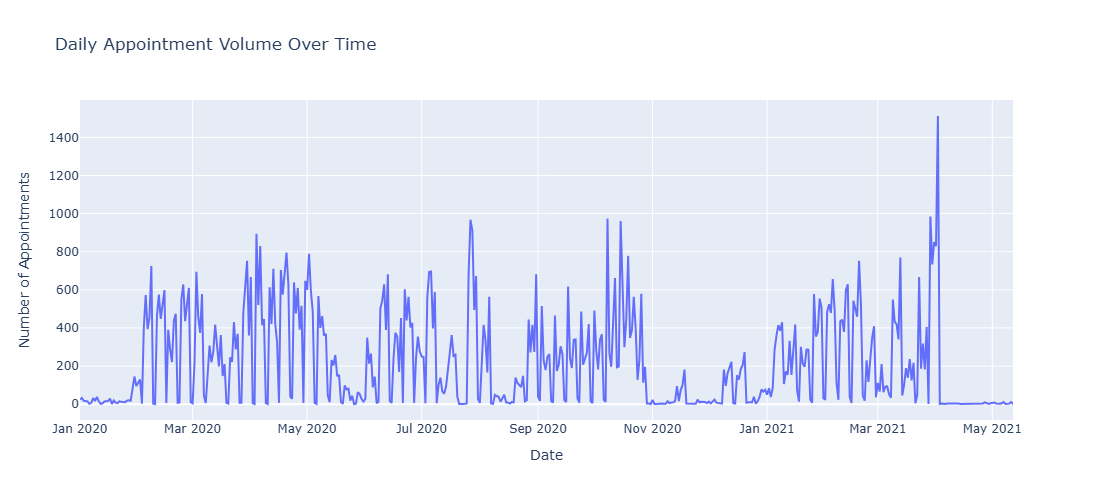

📊 Average daily appointments: 220
📊 Median daily appointments: 126
📊 Max daily appointments: 1512
📊 Min daily appointments: 1


In [25]:
# Daily appointment volume
daily_appointments = df.groupby('appointment_date').size().reset_index(name='count')

fig = px.line(daily_appointments, 
              x='appointment_date', 
              y='count',
              title='Daily Appointment Volume Over Time',
              labels={'appointment_date': 'Date', 'count': 'Number of Appointments'})

fig.update_layout(height=500)
fig.show()

print(f"📊 Average daily appointments: {daily_appointments['count'].mean():.0f}")
print(f"📊 Median daily appointments: {daily_appointments['count'].median():.0f}")
print(f"📊 Max daily appointments: {daily_appointments['count'].max()}")
print(f"📊 Min daily appointments: {daily_appointments['count'].min()}")

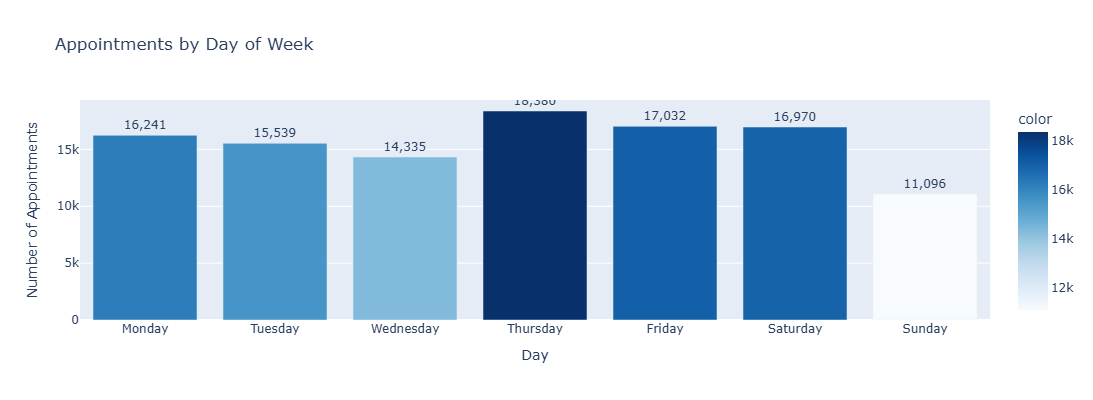


💡 INSIGHT: Identify which days have highest demand


In [26]:
# Appointments by day of week
day_of_week_counts = df.groupby('day_name').size().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

fig = px.bar(x=day_of_week_counts.index, 
             y=day_of_week_counts.values,
             title='Appointments by Day of Week',
             labels={'x': 'Day', 'y': 'Number of Appointments'},
             text=day_of_week_counts.values,
             color=day_of_week_counts.values,
             color_continuous_scale='Blues')

fig.update_traces(texttemplate='%{text:,}', textposition='outside')
fig.update_layout(height=400, showlegend=False)
fig.show()

print("\n💡 INSIGHT: Identify which days have highest demand")

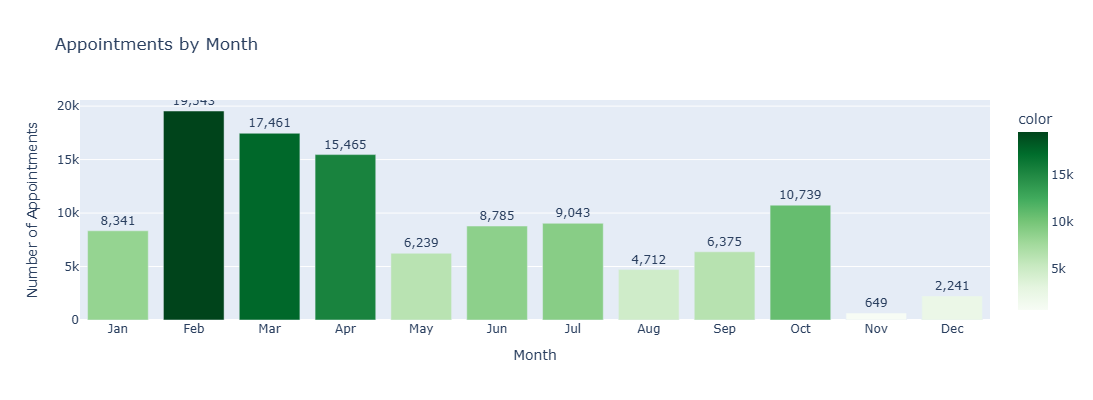

In [27]:
# Appointments by month
monthly_appointments = df.groupby('month').size()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = px.bar(x=month_names[:len(monthly_appointments)], 
             y=monthly_appointments.values,
             title='Appointments by Month',
             labels={'x': 'Month', 'y': 'Number of Appointments'},
             text=monthly_appointments.values,
             color=monthly_appointments.values,
             color_continuous_scale='Greens')

fig.update_traces(texttemplate='%{text:,}', textposition='outside')
fig.update_layout(height=400, showlegend=False)
fig.show()

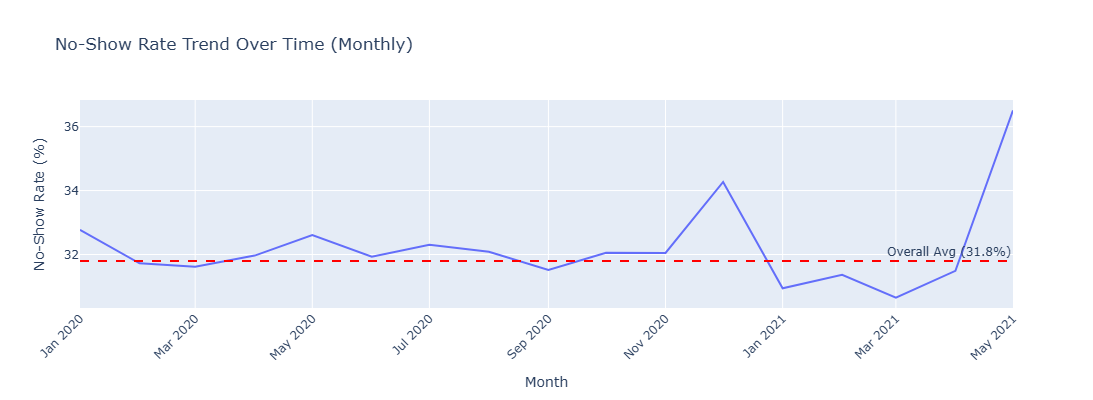

In [28]:
# No-show rate over time (by month)
df['year_month'] = df['appointment_date'].dt.to_period('M').astype(str)
monthly_noshow = df.groupby('year_month')['no_show'].apply(lambda x: (x == 'yes').sum() / len(x) * 100).reset_index()

fig = px.line(monthly_noshow, 
              x='year_month', 
              y='no_show',
              title='No-Show Rate Trend Over Time (Monthly)',
              labels={'year_month': 'Month', 'no_show': 'No-Show Rate (%)'})

fig.add_hline(y=31.8, line_dash="dash", line_color="red", 
              annotation_text="Overall Avg (31.8%)", annotation_position="top right")
fig.update_layout(height=400, xaxis_tickangle=-45)
fig.show()

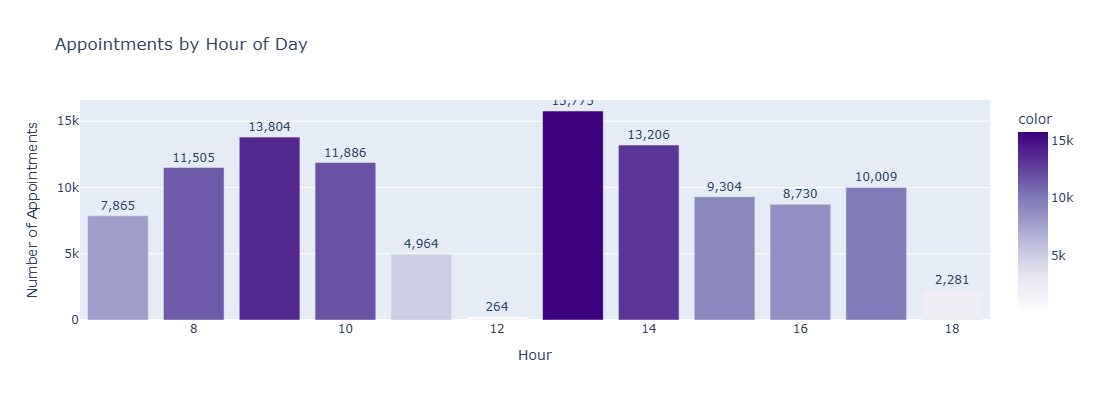


💡 Peak hour: 13:00 with 15,775 appointments


In [29]:
# Appointments by hour
hour_counts = df.groupby('appointment_time').size().sort_index()

fig = px.bar(x=hour_counts.index, 
             y=hour_counts.values,
             title='Appointments by Hour of Day',
             labels={'x': 'Hour', 'y': 'Number of Appointments'},
             text=hour_counts.values,
             color=hour_counts.values,
             color_continuous_scale='Purples')

fig.update_traces(texttemplate='%{text:,}', textposition='outside')
fig.update_layout(height=400, showlegend=False)
fig.show()

print(f"\n💡 Peak hour: {hour_counts.idxmax()}:00 with {hour_counts.max():,} appointments")

## 6. Correlation Analysis

**Objective:** Understand relationships between features and target variable

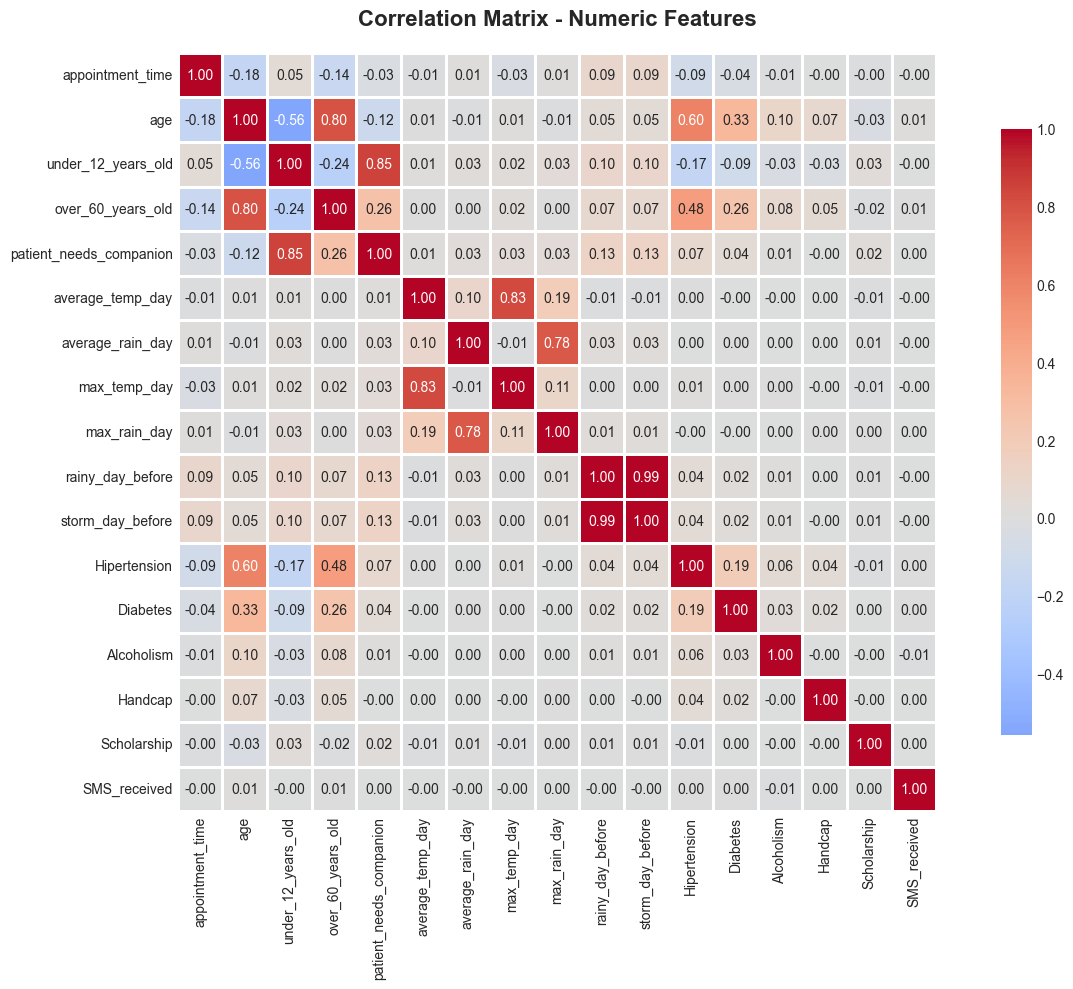

In [30]:
# Select numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove date-derived columns that aren't useful
numeric_cols = [col for col in numeric_cols if col not in ['year', 'month', 'day_of_week', 'week_of_year']]

# Calculate correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Numeric Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

CORRELATION WITH TARGET (no_show)

average_temp_day           0.090799
max_temp_day               0.027131
max_rain_day               0.023345
average_rain_day           0.004189
SMS_received               0.001019
Scholarship               -0.000146
Handcap                   -0.002168
Alcoholism                -0.010435
Diabetes                  -0.014137
appointment_time          -0.019201
age                       -0.021460
Hipertension              -0.028594
under_12_years_old        -0.040399
over_60_years_old         -0.052116
patient_needs_companion   -0.062855
rainy_day_before          -0.135039
storm_day_before          -0.135483



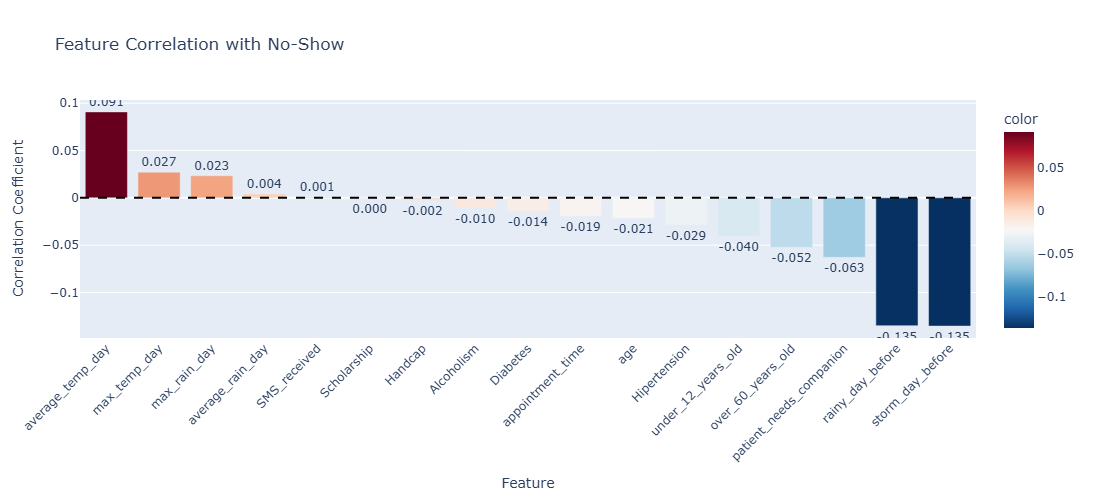

In [31]:
# Convert target to numeric for correlation
df['no_show_numeric'] = (df['no_show'] == 'yes').astype(int)

# Correlation with target
target_corr = df[numeric_cols + ['no_show_numeric']].corr()['no_show_numeric'].sort_values(ascending=False)
target_corr = target_corr.drop('no_show_numeric')

print("="*80)
print("CORRELATION WITH TARGET (no_show)")
print("="*80)
print(f"\n{target_corr.to_string()}")
print("\n" + "="*80)

fig = px.bar(x=target_corr.index, 
             y=target_corr.values,
             title='Feature Correlation with No-Show',
             labels={'x': 'Feature', 'y': 'Correlation Coefficient'},
             text=target_corr.values,
             color=target_corr.values,
             color_continuous_scale='RdBu_r')

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.update_layout(height=500, xaxis_tickangle=-45, showlegend=False)
fig.add_hline(y=0, line_dash="dash", line_color="black")
fig.show()

In [32]:
# Chi-square test for categorical variables vs target
categorical_features = ['specialty', 'gender', 'disability', 'place', 'appointment_shift', 
                       'rain_intensity', 'heat_intensity']

chi_square_results = []

for feature in categorical_features:
    # Create contingency table (remove NaN)
    contingency_table = pd.crosstab(df[feature].fillna('Missing'), df['no_show'])
    
    # Perform chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    chi_square_results.append({
        'Feature': feature,
        'Chi-Square': chi2,
        'P-Value': p_value,
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    })

chi_square_df = pd.DataFrame(chi_square_results).sort_values('Chi-Square', ascending=False)

print("="*80)
print("CHI-SQUARE TEST: CATEGORICAL FEATURES vs NO-SHOW")
print("="*80)
print("\n(Tests if feature distribution differs between show/no-show groups)")
print(f"\n{chi_square_df.to_string(index=False)}")
print("\n💡 P-Value < 0.05 = Statistically significant relationship")
print("="*80)

CHI-SQUARE TEST: CATEGORICAL FEATURES vs NO-SHOW

(Tests if feature distribution differs between show/no-show groups)

          Feature   Chi-Square      P-Value Significant
            place 48968.577419 0.000000e+00         Yes
   heat_intensity  2589.192224 0.000000e+00         Yes
       disability  2191.993380 0.000000e+00         Yes
        specialty  1867.660462 0.000000e+00         Yes
           gender    81.858984 1.677056e-18         Yes
appointment_shift    68.273821 1.422976e-16         Yes
   rain_intensity    28.530377 2.810563e-06         Yes

💡 P-Value < 0.05 = Statistically significant relationship


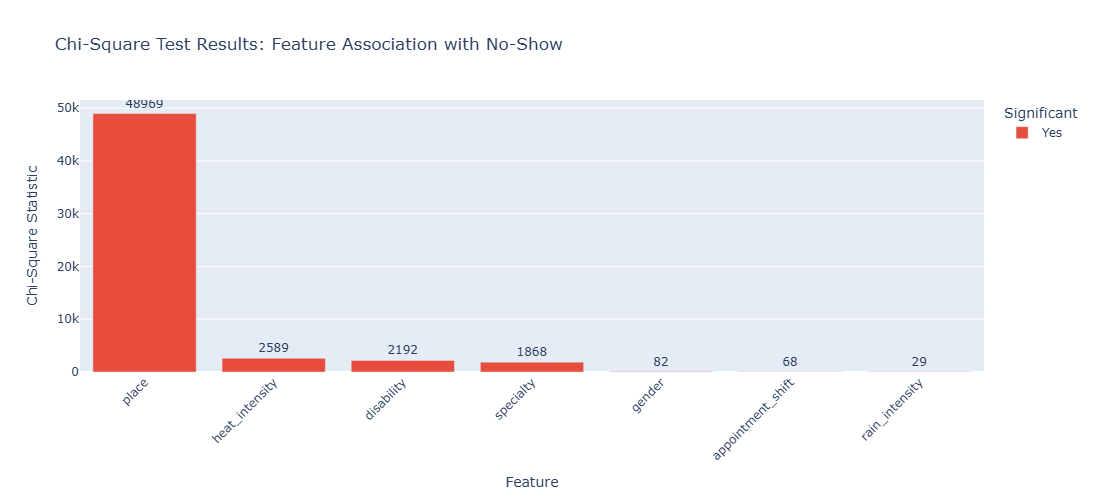

In [33]:
# Feature importance visualization from chi-square
fig = px.bar(chi_square_df, 
             x='Feature', 
             y='Chi-Square',
             title='Chi-Square Test Results: Feature Association with No-Show',
             labels={'Chi-Square': 'Chi-Square Statistic'},
             text='Chi-Square',
             color='Significant',
             color_discrete_map={'Yes': '#e74c3c', 'No': '#95a5a6'})

fig.update_traces(texttemplate='%{text:.0f}', textposition='outside')
fig.update_layout(height=500, xaxis_tickangle=-45)
fig.show()

## 7. Data Quality Issues & Anomalies

**Checking for:**
- Invalid values
- Outliers
- Inconsistencies
- Data entry errors

In [34]:
print("="*80)
print("DATA QUALITY AUDIT")
print("="*80)

# 1. Check gender values
print("\n1️⃣ GENDER VALUES:")
print(df['gender'].value_counts())
invalid_gender = df[~df['gender'].isin(['M', 'F'])]
print(f"   ⚠️  Invalid gender values: {len(invalid_gender)}")

# 2. Age outliers
print("\n2️⃣ AGE DISTRIBUTION:")
print(f"   Min age: {df['age'].min()}")
print(f"   Max age: {df['age'].max()}")
print(f"   Mean age: {df['age'].mean():.1f}")
negative_age = df[df['age'] < 0]
extreme_age = df[df['age'] > 120]
print(f"   ⚠️  Negative ages: {len(negative_age)}")
print(f"   ⚠️  Ages > 120: {len(extreme_age)}")

# 3. Check age flags consistency
df_age_check = df[df['age'].notna()].copy()
under_12_mismatch = df_age_check[(df_age_check['age'] < 12) & (df_age_check['under_12_years_old'] == 0)]
over_60_mismatch = df_age_check[(df_age_check['age'] > 60) & (df_age_check['over_60_years_old'] == 0)]
print(f"\n3️⃣ AGE FLAG CONSISTENCY:")
print(f"   ⚠️  Under 12 but flag=0: {len(under_12_mismatch)}")
print(f"   ⚠️  Over 60 but flag=0: {len(over_60_mismatch)}")

# 4. Temperature outliers
print(f"\n4️⃣ TEMPERATURE RANGES:")
print(f"   Avg temp: {df['average_temp_day'].min():.1f}°C to {df['average_temp_day'].max():.1f}°C")
print(f"   Max temp: {df['max_temp_day'].min():.1f}°C to {df['max_temp_day'].max():.1f}°C")
temp_negative = df[df['average_temp_day'] < 0]
temp_extreme = df[df['max_temp_day'] > 50]
print(f"   ⚠️  Negative avg temp: {len(temp_negative)}")
print(f"   ⚠️  Max temp > 50°C: {len(temp_extreme)}")

# 5. Duplicate records
print(f"\n5️⃣ DUPLICATE RECORDS:")
duplicates = df.duplicated().sum()
print(f"   Total duplicates: {duplicates}")

print("\n" + "="*80)

DATA QUALITY AUDIT

1️⃣ GENDER VALUES:
gender
M    82269
F    27077
I      247
Name: count, dtype: int64
   ⚠️  Invalid gender values: 247

2️⃣ AGE DISTRIBUTION:
   Min age: 2.0
   Max age: 110.0
   Mean age: 18.6
   ⚠️  Negative ages: 0
   ⚠️  Ages > 120: 0

3️⃣ AGE FLAG CONSISTENCY:
   ⚠️  Under 12 but flag=0: 1116
   ⚠️  Over 60 but flag=0: 377

4️⃣ TEMPERATURE RANGES:
   Avg temp: 8.9°C to 28.0°C
   Max temp: 13.3°C to 35.4°C
   ⚠️  Negative avg temp: 0
   ⚠️  Max temp > 50°C: 0

5️⃣ DUPLICATE RECORDS:
   Total duplicates: 36



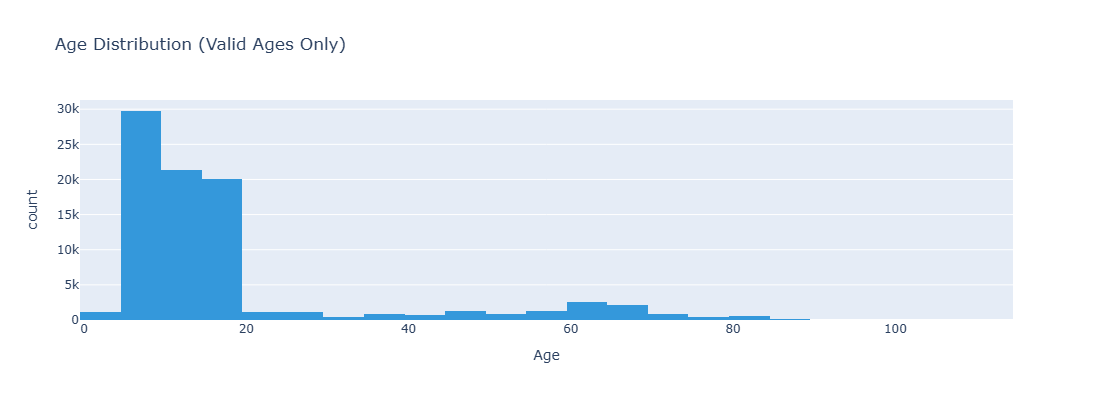

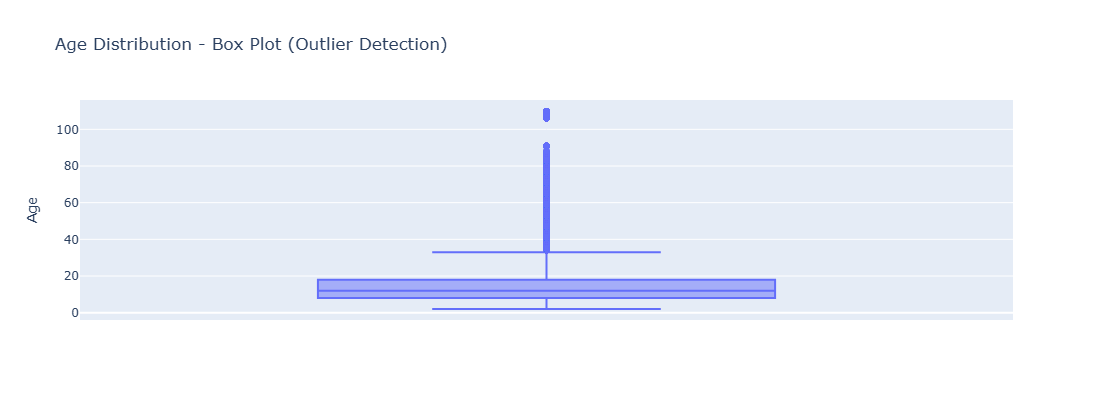

In [35]:
# Age distribution visualization
df_age_valid = df[(df['age'] >= 0) & (df['age'] <= 120)].copy()

fig = px.histogram(df_age_valid, 
                   x='age', 
                   nbins=50,
                   title='Age Distribution (Valid Ages Only)',
                   labels={'age': 'Age', 'count': 'Frequency'},
                   color_discrete_sequence=['#3498db'])

fig.update_layout(height=400, showlegend=False)
fig.show()

# Box plot for outliers
fig = px.box(df_age_valid, 
             y='age',
             title='Age Distribution - Box Plot (Outlier Detection)',
             labels={'age': 'Age'})
fig.update_layout(height=400)
fig.show()

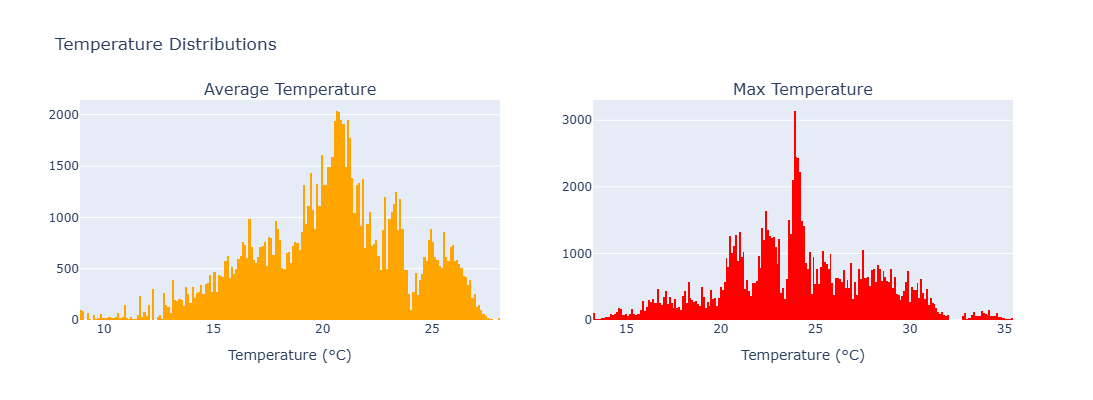

In [36]:
# Temperature distribution
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=('Average Temperature', 'Max Temperature'))

fig.add_trace(go.Histogram(x=df['average_temp_day'].dropna(), 
                           name='Avg Temp',
                           marker_color='orange'), row=1, col=1)

fig.add_trace(go.Histogram(x=df['max_temp_day'].dropna(), 
                           name='Max Temp',
                           marker_color='red'), row=1, col=2)

fig.update_layout(title_text='Temperature Distributions', height=400, showlegend=False)
fig.update_xaxes(title_text="Temperature (°C)", row=1, col=1)
fig.update_xaxes(title_text="Temperature (°C)", row=1, col=2)
fig.show()

In [37]:
# Check for date gaps
daily_appointments['date_diff'] = daily_appointments['appointment_date'].diff().dt.days
gaps = daily_appointments[daily_appointments['date_diff'] > 1]

print("="*80)
print("DATE SEQUENCE ANALYSIS")
print("="*80)
print(f"\n📅 Total unique dates: {len(daily_appointments)}")
print(f"📅 Expected date range: {(daily_appointments['appointment_date'].max() - daily_appointments['appointment_date'].min()).days + 1} days")
print(f"📅 Gaps found (days skipped): {len(gaps)}")

if len(gaps) > 0:
    print(f"\n⚠️  Date gaps detected:")
    print(gaps[['appointment_date', 'date_diff']].head(10).to_string(index=False))
else:
    print("\n✅ No date gaps - continuous time series")

print("\n" + "="*80)

DATE SEQUENCE ANALYSIS

📅 Total unique dates: 498
📅 Expected date range: 498 days
📅 Gaps found (days skipped): 0

✅ No date gaps - continuous time series



## 8. Key Findings & Preprocessing Strategy

**Summary of EDA insights and decisions for next steps**

In [38]:
print("="*80)
print("🎯 KEY FINDINGS FROM EDA")
print("="*80)

print("\n📊 DATASET OVERVIEW:")
print(f"   • Total records: {len(df):,}")
print(f"   • Features: {len(df.columns)}")
print(f"   • Time period: {df['appointment_date'].min()} to {df['appointment_date'].max()}")
print(f"   • Target distribution: {target_pct['no']:.1f}% show, {target_pct['yes']:.1f}% no-show")

print("\n⚠️  CRITICAL MISSING DATA:")
print(f"   • Age: {df['age'].isnull().sum():,} ({df['age'].isnull().sum()/len(df)*100:.1f}%) - SEVERE")
print(f"   • Specialty: {df['specialty'].isnull().sum():,} ({df['specialty'].isnull().sum()/len(df)*100:.1f}%)")
print(f"   • Disability: {df['disability'].isnull().sum():,} ({df['disability'].isnull().sum()/len(df)*100:.1f}%)")
print(f"   • Place: {df['place'].isnull().sum():,} ({df['place'].isnull().sum()/len(df)*100:.1f}%)")

print("\n🔍 NO-SHOW PATTERNS:")
print(f"   • SMS reduces no-show by {abs(sms_noshow[0] - sms_noshow[1]):.1f} percentage points")
print(f"   • Highest no-show specialty: {specialty_noshow.idxmax()} ({specialty_noshow.max():.1f}%)")
print(f"   • Afternoon appointments: {shift_noshow.get('afternoon', 0):.1f}% no-show rate")

print("\n📅 TEMPORAL INSIGHTS:")
print(f"   • Average daily appointments: {daily_appointments['count'].mean():.0f}")
print(f"   • Peak hour: {hour_counts.idxmax()}:00")
print(f"   • Date gaps: {len(gaps)} days with no appointments")

print("\n🚨 DATA QUALITY ISSUES:")
print(f"   • Invalid gender values: {len(invalid_gender)}")
print(f"   • Age outliers: {len(negative_age) + len(extreme_age)}")
print(f"   • Duplicate records: {duplicates}")

print("\n" + "="*80)

🎯 KEY FINDINGS FROM EDA

📊 DATASET OVERVIEW:
   • Total records: 109,593
   • Features: 34
   • Time period: 2020-01-01 00:00:00 to 2021-05-12 00:00:00
   • Target distribution: 68.2% show, 31.8% no-show

⚠️  CRITICAL MISSING DATA:
   • Age: 22,960 (21.0%) - SEVERE
   • Specialty: 20,127 (18.4%)
   • Disability: 16,601 (15.1%)
   • Place: 11,539 (10.5%)

🔍 NO-SHOW PATTERNS:
   • SMS reduces no-show by 0.1 percentage points
   • Highest no-show specialty: sem especialidade (52.8%)
   • Afternoon appointments: 30.7% no-show rate

📅 TEMPORAL INSIGHTS:
   • Average daily appointments: 220
   • Peak hour: 13:00
   • Date gaps: 0 days with no appointments

🚨 DATA QUALITY ISSUES:
   • Invalid gender values: 247
   • Age outliers: 0
   • Duplicate records: 36



In [39]:
print("="*80)
print("📝 PREPROCESSING STRATEGY - DECISION MATRIX")
print("="*80)

strategy = {
    'Feature': ['age', 'specialty', 'disability', 'place', 'weather', 
                'gender', 'duplicates', 'date', 'target'],
    'Issue': [
        '20.9% missing',
        '18.4% missing',
        '15.1% missing',
        '10.5% missing',
        '~2% missing',
        'Invalid values (I)',
        f'{duplicates} duplicates',
        f'{len(gaps)} date gaps',
        '31.8% class imbalance'
    ],
    'Strategy': [
        'Median imputation by specialty/gender OR create "Unknown" category',
        'Create "Unknown" category (preserves 100% data)',
        'Create "Unknown" category OR mode imputation',
        'Create "Unknown" category OR mode by specialty',
        'Forward fill / Backward fill (temporal continuity)',
        'Convert "I" to most common OR separate category',
        'Keep first occurrence only',
        'Acceptable for forecasting (likely weekends/holidays)',
        'SMOTE + Class weights + Threshold tuning'
    ]
}

strategy_df = pd.DataFrame(strategy)
print(f"\n{strategy_df.to_string(index=False)}")
print("\n" + "="*80)

📝 PREPROCESSING STRATEGY - DECISION MATRIX

   Feature                 Issue                                                           Strategy
       age         20.9% missing Median imputation by specialty/gender OR create "Unknown" category
 specialty         18.4% missing                    Create "Unknown" category (preserves 100% data)
disability         15.1% missing                       Create "Unknown" category OR mode imputation
     place         10.5% missing                     Create "Unknown" category OR mode by specialty
   weather           ~2% missing                 Forward fill / Backward fill (temporal continuity)
    gender    Invalid values (I)                    Convert "I" to most common OR separate category
duplicates         36 duplicates                                         Keep first occurrence only
      date           0 date gaps              Acceptable for forecasting (likely weekends/holidays)
    target 31.8% class imbalance                        

In [40]:
print("="*80)
print("✅ FEATURES TO ENGINEER")
print("="*80)

features_to_create = """
📅 TEMPORAL FEATURES:
   • day_of_week, month, quarter, year
   • week_of_year, day_of_month
   • is_weekend (binary)
   • is_month_start, is_month_end (binary)
   • days_since_start (for time series)

👤 PATIENT FEATURES:
   • age_group (bins: 0-12, 13-18, 19-40, 41-60, 60+)
   • total_health_conditions (sum of Hipertension, Diabetes, Alcoholism, Handcap)
   • has_any_condition (binary)

🔗 INTERACTION FEATURES:
   • specialty × place
   • disability × age_group
   • sms × shift
   • weather × shift

📊 AGGREGATED FEATURES:
   • historical_noshow_rate_by_specialty
   • historical_noshow_rate_by_place
   • avg_appointments_per_day_by_specialty

⏰ TIME SERIES FEATURES (for forecasting):
   • lag_1, lag_7, lag_30 (previous day, week, month volumes)
   • rolling_mean_7, rolling_mean_30
   • rolling_std_7 (volatility)
"""

print(features_to_create)
print("="*80)

✅ FEATURES TO ENGINEER

📅 TEMPORAL FEATURES:
   • day_of_week, month, quarter, year
   • week_of_year, day_of_month
   • is_weekend (binary)
   • is_month_start, is_month_end (binary)
   • days_since_start (for time series)

👤 PATIENT FEATURES:
   • age_group (bins: 0-12, 13-18, 19-40, 41-60, 60+)
   • total_health_conditions (sum of Hipertension, Diabetes, Alcoholism, Handcap)
   • has_any_condition (binary)

🔗 INTERACTION FEATURES:
   • specialty × place
   • disability × age_group
   • sms × shift
   • weather × shift

📊 AGGREGATED FEATURES:
   • historical_noshow_rate_by_specialty
   • historical_noshow_rate_by_place
   • avg_appointments_per_day_by_specialty

⏰ TIME SERIES FEATURES (for forecasting):
   • lag_1, lag_7, lag_30 (previous day, week, month volumes)
   • rolling_mean_7, rolling_mean_30
   • rolling_std_7 (volatility)



In [41]:
print("="*80)
print("🎯 NEXT STEPS: DAY 2 PREPROCESSING")
print("="*80)

next_steps = """
✅ COMPLETED - DAY 1 EDA:
   ✓ Dataset overview
   ✓ Missing data analysis
   ✓ Target distribution
   ✓ Feature distributions
   ✓ Temporal analysis
   ✓ Correlation analysis
   ✓ Data quality audit
   ✓ Preprocessing strategy

🔜 TODO - DAY 2 PREPROCESSING:
   1. Handle missing values (age, specialty, disability, place)
   2. Fix data quality issues (gender, outliers, duplicates)
   3. Feature engineering (temporal, interactions, aggregations)
   4. Encode categorical variables
   5. Create classification dataset (all features)
   6. Create time series dataset (daily aggregated volumes)
   7. Train-test split (stratified for classification, chronological for time series)
   8. Save processed datasets

🔜 TODO - DAY 3-4 CLASSIFICATION:
   • Handle class imbalance
   • Train 6+ models
   • Evaluate and compare
   • Select best model

🔜 TODO - DAY 5-6 FORECASTING:
   • Time series feature engineering
   • Train 6+ forecasting models
   • Evaluate and compare
   • Select best model

🔜 TODO - DAY 7-8 STREAMLIT APP:
   • Build interactive dashboard
   • Deploy models
   • Create prediction interfaces
"""

print(next_steps)
print("="*80)

🎯 NEXT STEPS: DAY 2 PREPROCESSING

✅ COMPLETED - DAY 1 EDA:
   ✓ Dataset overview
   ✓ Missing data analysis
   ✓ Target distribution
   ✓ Feature distributions
   ✓ Temporal analysis
   ✓ Correlation analysis
   ✓ Data quality audit
   ✓ Preprocessing strategy

🔜 TODO - DAY 2 PREPROCESSING:
   1. Handle missing values (age, specialty, disability, place)
   2. Fix data quality issues (gender, outliers, duplicates)
   3. Feature engineering (temporal, interactions, aggregations)
   4. Encode categorical variables
   5. Create classification dataset (all features)
   6. Create time series dataset (daily aggregated volumes)
   7. Train-test split (stratified for classification, chronological for time series)
   8. Save processed datasets

🔜 TODO - DAY 3-4 CLASSIFICATION:
   • Handle class imbalance
   • Train 6+ models
   • Evaluate and compare
   • Select best model

🔜 TODO - DAY 5-6 FORECASTING:
   • Time series feature engineering
   • Train 6+ forecasting models
   • Evaluate and comp